In [495]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Aim is to predict the marks of students of the test data

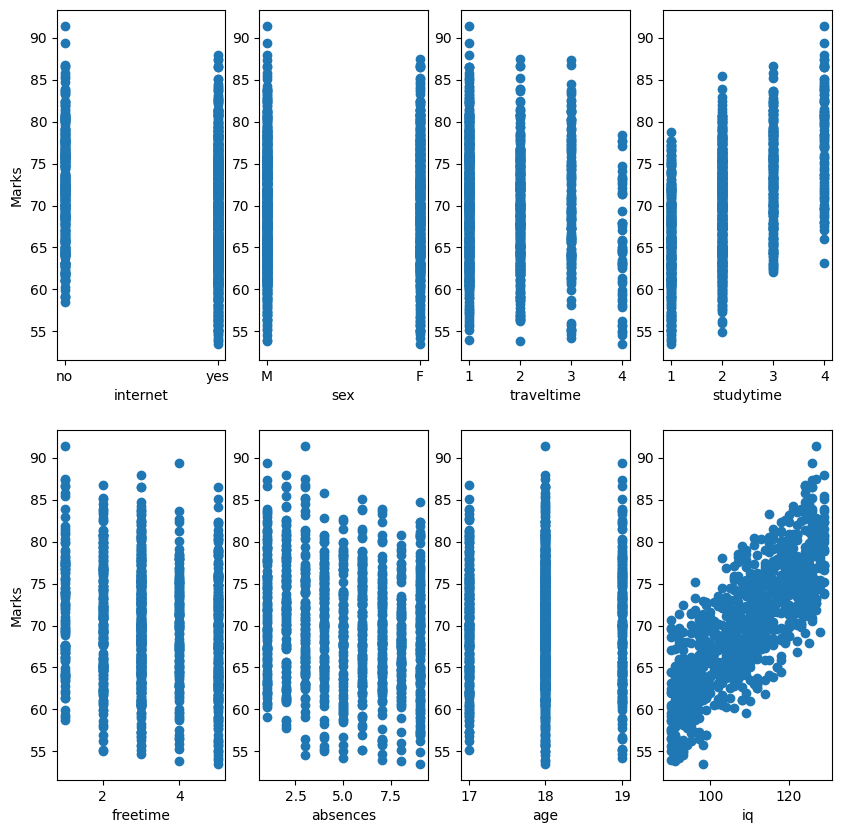

In [496]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

x_features=['internet', 'sex', 'traveltime','studytime', 'freetime'  ,'absences','age', 'iq', 'marks']
# Try plotting y_train with different features
fig,ax=plt.subplots(2, 4, figsize=(10, 10))
for i in range(len(ax)):
    for j in range(len(ax[i])):
        ax[i][j].scatter(x_train[:,i*4+j],y_train)
        ax[i][j].set_xlabel(x_features[i*4+j])
    ax[i][0].set_ylabel("Marks")
plt.show()
# To get an idea whether to add some features or not
# Add some features if required in x_train
# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
  # ---------
    # Your code here
    for row in x_train:
        if row[0]=='yes':
            row[0]=1
        else:
            row[0]=0
        if row[1]=='M':
            row[1]=1
        else:
            row[1]=0
  # ---------
    return x_train

x_train=feature_changing(x_train)




In [497]:
def z_score(x_train):

  # ---------
    # write the code for feature scaling here
    # Your code here
    x_mean = np.mean(x_train,axis=0)
    x2_mean = np.mean(x_train**2,axis=0)
    x_std= (x2_mean - x_mean**2)**(0.5)

    m = x_train.shape[0]

    x_train = (x_train - x_mean)/x_std
    
    
  # ---------
    

    return x_train,x_std,x_mean


In [498]:
def cost(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Use mean square error as cost function
    cost=0.0
    m= x_train.shape[0]
    for i in range(m):
        fx= np.dot(w,x_train[i]) + b
        cost = cost + (fx - y_train[i])**2

    loss = cost/(2*m)
  # ---------

    return loss


In [499]:
def gradient_descent(x_train,y_train,w,b):

  # ---------
    # Your code here
    m,n = x_train.shape           #(number of examples, number of features)
    dj_dw = np.zeros(n)
    dj_db = 0.0

    for i in range(m):                             
        error = float((np.dot(x_train[i], w) + b) - y_train[i])
       # print('ndim: ',error.ndim)
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + error * x_train[i, j]    

        dj_db = dj_db + error                       
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m


    alpha=0.1

    w = w - alpha*dj_dw
    b= b - alpha*dj_db
    
    # Choose learning rate yourself
  # ---------

    return w,b

In [500]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1])
b = np.random.randn(1)

old_cost = 0.
while abs(old_cost - cost(x_train,y_train,w,b))>0.000001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12160\2430483818.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  error = float((np.dot(x_train[i], w) + b) - y_train[i])


In [501]:
x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b


accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
